In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [5]:
from google.colab import files
data = files.upload()

Saving Live.csv to Live.csv


In [6]:
df = pd.read_csv('Live.csv')

In [7]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [9]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [10]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [11]:
# view how many different types of variables are there

len(df['status_id'].unique())

6997

In [12]:
len(df['status_published'].unique())

6913

In [13]:
len(df['status_id'].unique())

6997

In [14]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [16]:
df.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [17]:
# Remove the labels from the features
# axis 1 refers to the columns
X= df.drop('status_type', axis = 1)

In [18]:
y = df['status_type']

Convert categorical variables into integers

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


Feature Scaling 

In [23]:
cols = X.columns

In [24]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [25]:
X = pd.DataFrame(X, columns=[cols])

In [26]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


 Use elbow method to find optimal number of clusters 

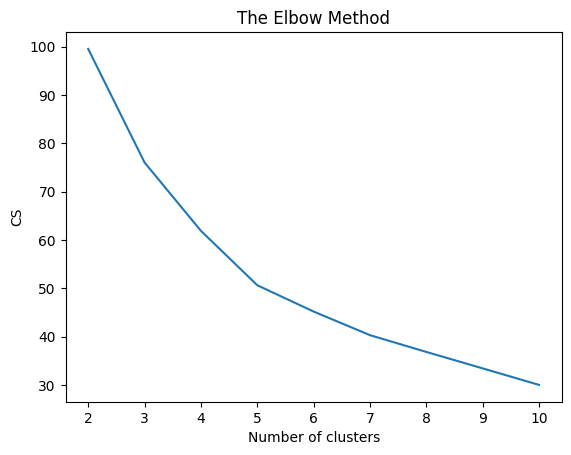

In [27]:
from sklearn.cluster import KMeans
cs = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

k-means=5

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [30]:
X.shape

(7050, 9)

K-Means model parameters study 

In [29]:
#5 clusters for 9 features. 
kmeans.cluster_centers_

array([[ 1.77588792e-02,  1.72773684e-03,  2.14071321e-03,
         1.70459783e-02,  3.95611321e-03,  1.46746097e-03,
         1.28760207e-03,  2.09427293e-03,  1.27172293e-03],
       [ 4.80915869e-01,  3.09174534e-03,  3.86870488e-03,
         4.79602741e-01,  5.46791029e-03,  8.50693853e-03,
         1.32822169e-03,  3.71712666e-04, -1.25767452e-17],
       [ 2.91213938e-01,  1.34555671e-01,  2.13653335e-01,
         2.24645102e-01,  3.87814487e-01,  1.45612921e-01,
         8.82977395e-02,  4.53671665e-02,  6.73624288e-02],
       [ 6.01414287e-02,  8.01094991e-02,  7.26414117e-02,
         4.32826519e-02,  1.10158590e-01,  6.40519842e-03,
         2.17793302e-02,  2.52055661e-02,  1.72736733e-02],
       [ 2.05355168e-01,  3.79435226e-03,  6.77830422e-03,
         2.02740569e-01,  1.33636899e-02,  1.01100178e-02,
         2.98067881e-03,  3.60478453e-03,  2.33623866e-03]])

In [31]:
kmeans.inertia_

50.636859067364696

Low Inertia

Check quality of weak classification by the model

In [51]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

In [34]:
print(labels)
print(y)

[3 0 0 ... 0 0 0]
[3 1 3 ... 1 1 1]


In [35]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 789 out of 7050 samples were correctly labeled.


In [52]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.11


In [38]:
kmeans_2 = KMeans(n_clusters=2, random_state=0) 

kmeans_2.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [39]:
kmeans_2.inertia_

99.50082638379878

In [40]:
kmeans_3 = KMeans(n_clusters=7, random_state=0) 

kmeans_3.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [41]:
kmeans_3.inertia_

40.31313780575478

In [53]:
labels_3 = kmeans_3.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels_3)

In [54]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 3810 out of 7050 samples were correctly labeled.


In [55]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.54


In [59]:
kmeans_10 = KMeans(n_clusters=6, random_state=0) 

kmeans_10.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [62]:
labels_10 = kmeans_10.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels_10)

In [63]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 320 out of 7050 samples were correctly labeled.


In [64]:
kmeans_11 = KMeans(n_clusters=8, random_state=0) 

kmeans_11.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=0)

In [65]:
labels_11 = kmeans_11.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels_11)

In [66]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1265 out of 7050 samples were correctly labeled.


In [44]:
kmeans_4 = KMeans(n_clusters=9, random_state=0) 

kmeans_4.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=0)

In [45]:
kmeans_4.inertia_

33.442189491032835

In [56]:
labels_4 = kmeans_4.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels_4)

In [57]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 589 out of 7050 samples were correctly labeled.


In [46]:
kmeans_5 = KMeans(n_clusters=12, random_state=0) 

kmeans_5.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=0)

In [47]:
kmeans_5.inertia_

26.748909284068084

In [48]:
labels_5 = kmeans_5.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels_5)

In [49]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 355 out of 7050 samples were correctly labeled.


In [69]:
X

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [75]:
kmeans_3.labels_

array([6, 1, 3, ..., 1, 3, 1], dtype=int32)

# Comparing the different number of clusters used, the best number of clusters is 7. 3810 out of 7050 samples were correctly labeled, 54%. This is not a good accuracy prediction. Probably this data being unlabeled to cluster for the K-Means algorithm, the model did not see clear patterns to seperate the data into different groups. 

Text(0.5, 1.0, 'Predicted')

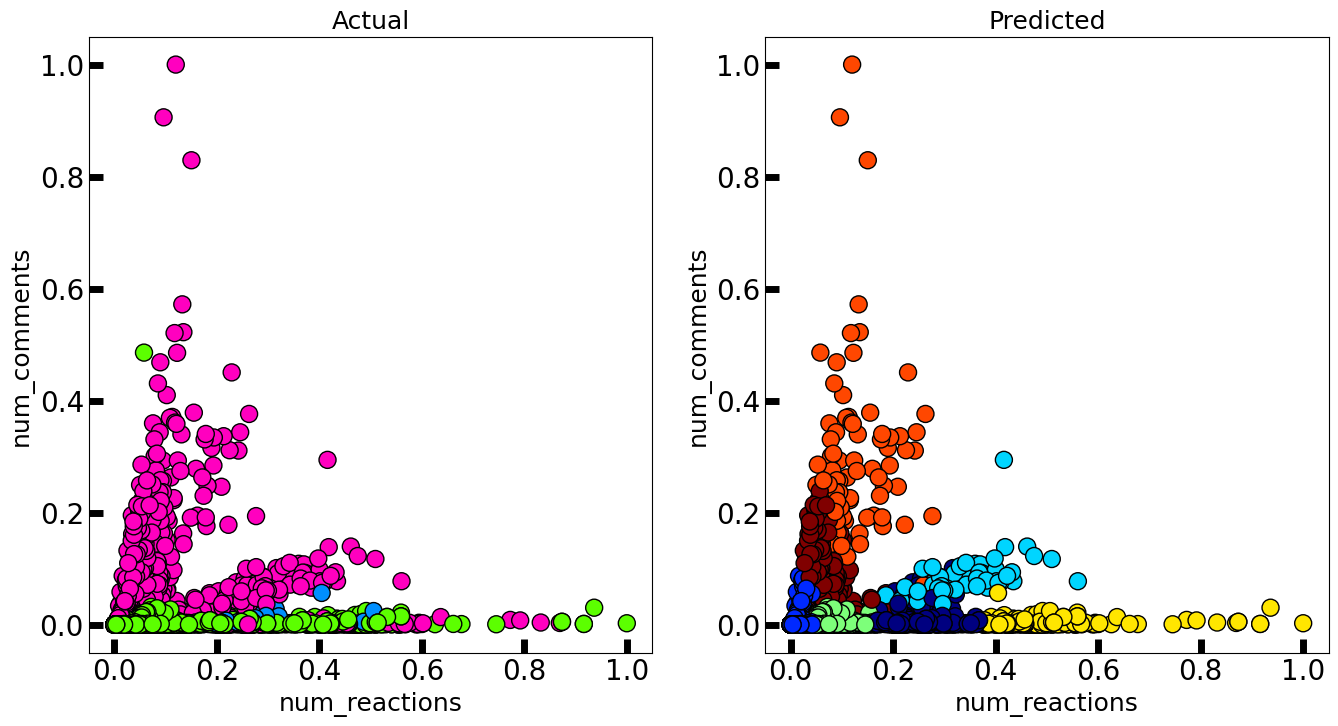

In [70]:
#this will tell us to which cluster does the data observations belong.
new_labels = kmeans_3.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('num_reactions', fontsize=18)
axes[0].set_ylabel('num_comments', fontsize=18)
axes[1].set_xlabel('num_reactions', fontsize=18)
axes[1].set_ylabel('num_comments', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)